# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Write your code here
df_shape = df.shape
print(f"The number of rows that are present in the data is {df_shape[0]}")
print(f"The number of columns that are present in the data is {df_shape[1]}")

The number of rows that are present in the data is 1898
The number of columns that are present in the data is 9


#### Observations:
The number of rows that are present in the data is 1898.
The number of columns that are present in the data is 9.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There is 1 column of type float64, 4 of type int64, and 4 of type object. There appears to be no missing value, more investigation must be done.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [19]:
# Write your code here
print(f"There are {df.isnull().sum().sum()} non-null value(s)")

print(df['order_id'].value_counts())
print(df['customer_id'].value_counts())
print(df['restaurant_name'].value_counts())
print(df['cuisine_type'].value_counts())
print(df['cost_of_the_order'].value_counts())
print(df['day_of_the_week'].value_counts())
print(df['rating'].value_counts())
print(df['food_preparation_time'].value_counts())
print(df['delivery_time'].value_counts())

There are 0 non-null value(s)
order_id
1477147    1
1477697    1
1477555    1
1478028    1
1478308    1
          ..
1478087    1
1476775    1
1478421    1
1476774    1
1478056    1
Name: count, Length: 1898, dtype: int64
customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: count, Length: 1200, dtype: int64
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64
cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     4

#### Observations:
There appears to be 0 non-null values in the data 

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [20]:
# Write your code here"
print(f"The minimum time it takes for food to be prepared once an order is placed is {df.describe().T.loc[['food_preparation_time'],['min']]['min'][0]} minutes")
print(f"The maximum time it takes for food to be prepared once an order is placed is {df.describe().T.loc[['food_preparation_time'],['max']]['max'][0]} minutes")
print(f"The average time it takes for food to be prepared once an order is placed is {df.describe().T.loc[['food_preparation_time'],['mean']]['mean'][0]} minutes")
df.describe().T

The minimum time it takes for food to be prepared once an order is placed is 20.0 minutes
The maximum time it takes for food to be prepared once an order is placed is 35.0 minutes
The average time it takes for food to be prepared once an order is placed is 27.371970495258168 minutes


C:\Users\Owner\AppData\Local\Temp\ipykernel_22964\2019710004.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"The minimum time it takes for food to be prepared once an order is placed is {df.describe().T.loc[['food_preparation_time'],['min']]['min'][0]} minutes")
C:\Users\Owner\AppData\Local\Temp\ipykernel_22964\2019710004.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"The maximum time it takes for food to be prepared once an order is placed is {df.describe().T.loc[['food_preparation_time'],['max']]['max'][0]} minutes")
C:\Users\Owner\AppData\Local\Temp\ipykernel_22964\2019710004.py:4: FutureW

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
The minimum time it takes for food to be prepared once an order is placed is 20.0 minutes
The maximum time it takes for food to be prepared once an order is placed is 35.0 minutes
The average time it takes for food to be prepared once an order is placed is 27.371970495258168 minutes

### **Question 5:** How many orders are not rated? [1 mark]

In [23]:
# Write the code here
print(f"There are {df['rating'].value_counts()['Not given']} orders that are not rated")
df['rating'].value_counts()

There are 736 orders that are not rated


rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observations:
There are 736 orders that are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [13]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

<Axes: xlabel='customer_id', ylabel='Count'>

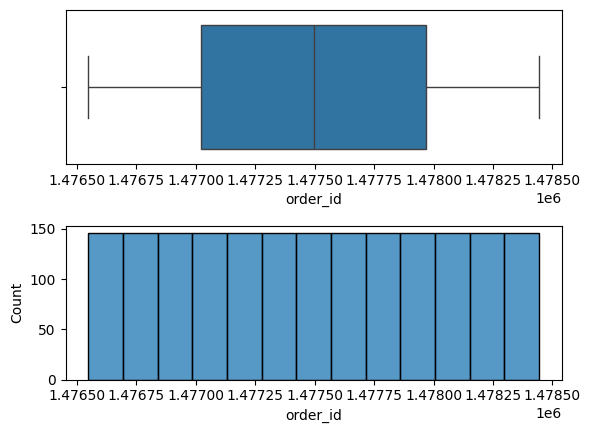

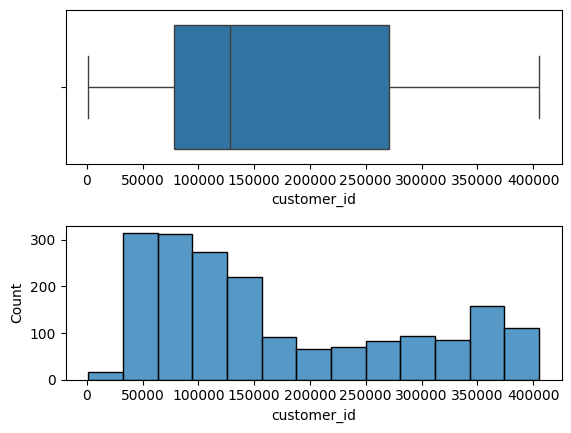

In [28]:
# Write the code here
%matplotlib inline
fig, axs = plt.subplots(2,1)
plt.subplots_adjust(hspace=0.4)
sns.boxplot(data=df, x='order_id', ax=axs[0])
sns.histplot(data=df, x='order_id', ax=axs[1])

fig, axs = plt.subplots(2,1)
plt.subplots_adjust(hspace=0.4)
sns.boxplot(data=df, x='customer_id', ax=axs[0])
sns.histplot(data=df, x='customer_id', ax=axs[1])


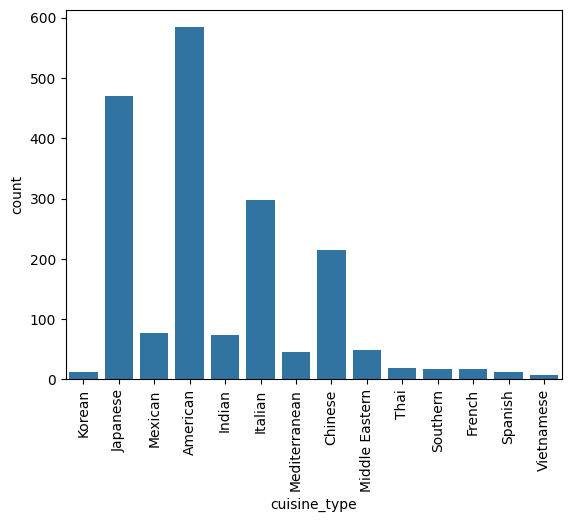

In [42]:
sns.countplot(data=df, x='cuisine_type')
plt.xticks(rotation=90);

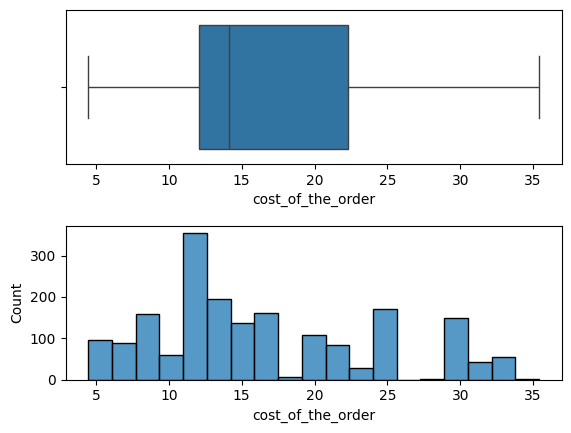

In [45]:
fig, axs = plt.subplots(2,1)
plt.subplots_adjust(hspace=0.4)
sns.boxplot(data=df, x='cost_of_the_order', ax=axs[0]);
sns.histplot(data=df, x='cost_of_the_order', ax=axs[1]);

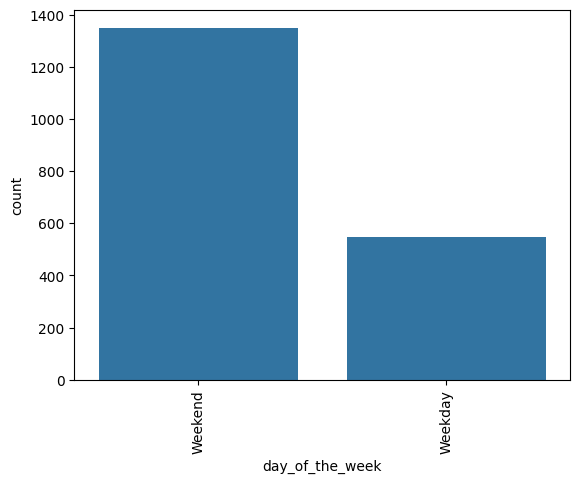

In [46]:
sns.countplot(data=df, x='day_of_the_week')

In [54]:
df['rating'] = df['rating'].replace(['Not given'], np.nan)

0       NaN
1       NaN
2         5
3         3
4         4
       ... 
1893      5
1894      5
1895    NaN
1896      5
1897    NaN
Name: rating, Length: 1898, dtype: object

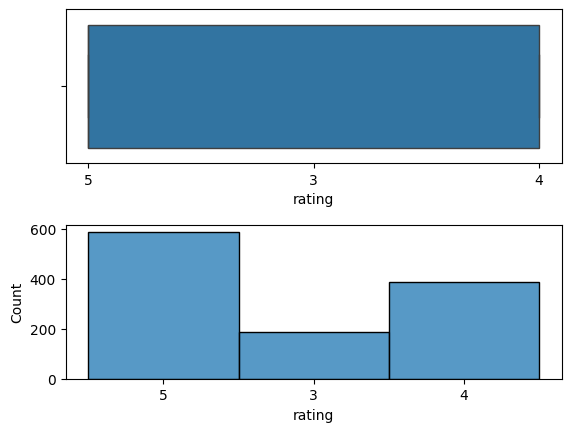

In [56]:
fig, axs = plt.subplots(2,1)
plt.subplots_adjust(hspace=0.4)
sns.boxplot(data=df, x='rating', ax=axs[0]);
sns.histplot(data=df, x='rating', ax=axs[1]);

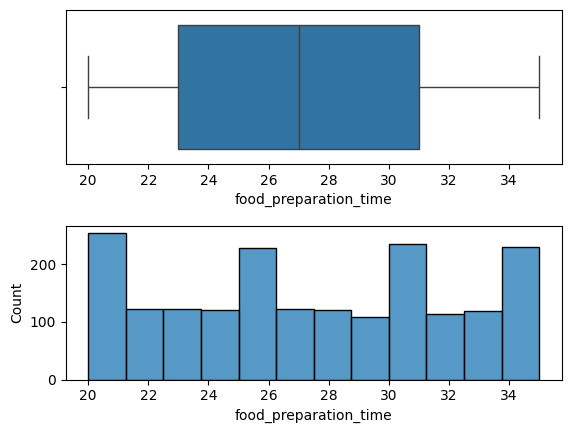

In [57]:
fig, axs = plt.subplots(2,1)
plt.subplots_adjust(hspace=0.4)
sns.boxplot(data=df, x='food_preparation_time', ax=axs[0]);
sns.histplot(data=df, x='food_preparation_time', ax=axs[1]);

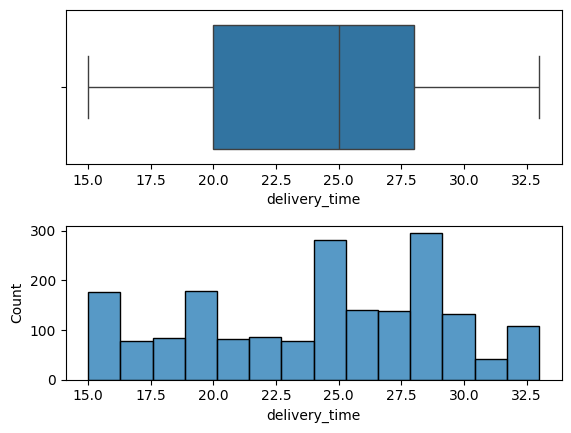

In [58]:
fig, axs = plt.subplots(2,1)
plt.subplots_adjust(hspace=0.4)
sns.boxplot(data=df, x='delivery_time', ax=axs[0]);
sns.histplot(data=df, x='delivery_time', ax=axs[1]);

In [204]:
df['restaurant_name'].value_counts()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [39]:
# Write the code here
for i in range(5):
    if i==0:
        print(f"1st: {df['restaurant_name'].value_counts().index[i]}")
    if i==1:
        print(f"2nd: {df['restaurant_name'].value_counts().index[i]}")
    if i==2:
        print(f"3rd: {df['restaurant_name'].value_counts().index[i]}")
    if i==3:
        print(f"4th: {df['restaurant_name'].value_counts().index[i]}")
    if i==4:
        print(f"5th: {df['restaurant_name'].value_counts().index[i]}")
        

1st: Shake Shack
2nd: The Meatball Shop
3rd: Blue Ribbon Sushi
4th: Blue Ribbon Fried Chicken
5th: Parm


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

#### Observations:
1st: Shake Shack
2nd: The Meatball Shop
3rd: Blue Ribbon Sushi
4th: Blue Ribbon Fried Chicken
5th: Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [5]:
# Write the code here
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week')
plt.xticks(rotation=90);

NameError: name 'sns' is not defined

In [63]:
print("American is the most popular cuisine type on the weekends")

American is the most popular cuisine type on the weekends


#### Observations:
American is the most popular cuisine type on the weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [65]:
# Write the code here
print(f"{(df[df['cost_of_the_order'] > 20].shape[0] /df.shape[0])*100}% of the orders cost more than 20 dollars")

29.24130663856691% of the orders cost more than 20 dollars


#### Observations:
29.24130663856691% of the orders cost more than 20 dollars

### **Question 10**: What is the mean order delivery time? [1 mark]

In [69]:
# Write the code here
print(f"The mean order delivery time is {df['delivery_time'].mean()} minutes")


The mean order delivery time is 24.161749209694417 minutes


#### Observations:
The mean order delivery time is 24.161749209694417 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [89]:
# Write the code here
for i in range(3):
    customer_id = df['customer_id'].value_counts().index[i]
    num_orders = df['customer_id'].value_counts()[customer_id]
    if i==0:
        print(f"1st: CustomerID {customer_id} | {num_orders} Orders")
    if i==1:
        print(f"2nd: CustomerID {customer_id} | {num_orders} Orders")
    if i==2:
        print(f"3rd: CustomerID {customer_id} | {num_orders} Orders")

1st: CustomerID 52832 | 13 Orders
2nd: CustomerID 47440 | 10 Orders
3rd: CustomerID 83287 | 9 Orders


#### Observations:
1st: CustomerID 52832 | 13 Orders
2nd: CustomerID 47440 | 10 Orders
3rd: CustomerID 83287 | 9 Orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


array([nan, '5', '3', '4'], dtype=object)

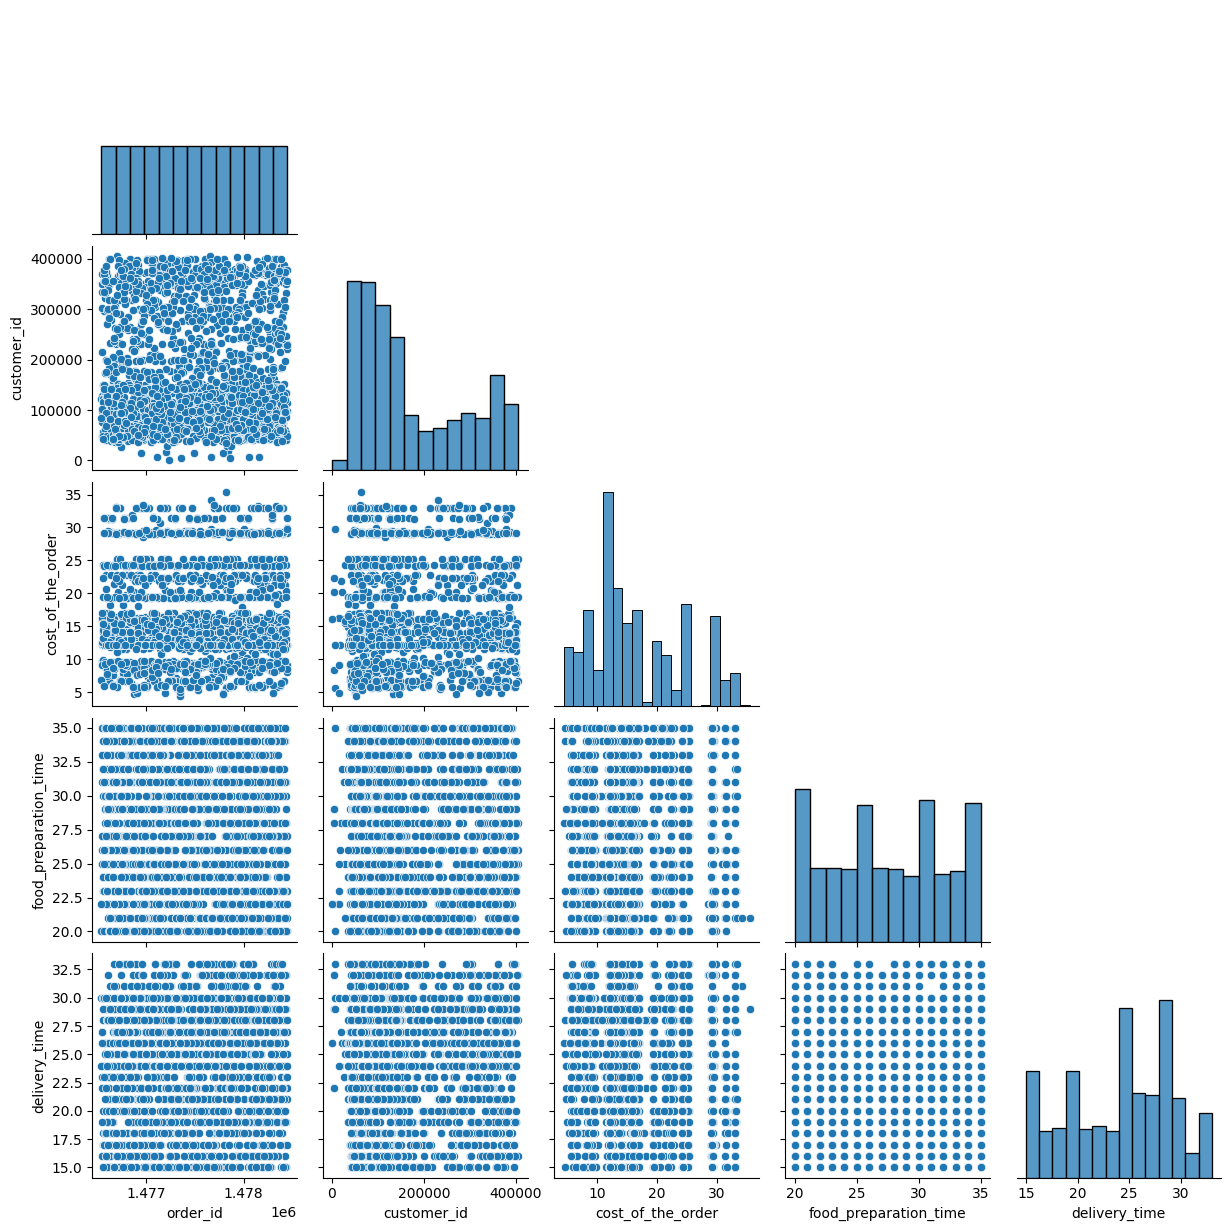

In [95]:
# Write the code here
sns.pairplot(data=df, kind='scatter', corner=True);

<Axes: xlabel='cost_of_the_order'>

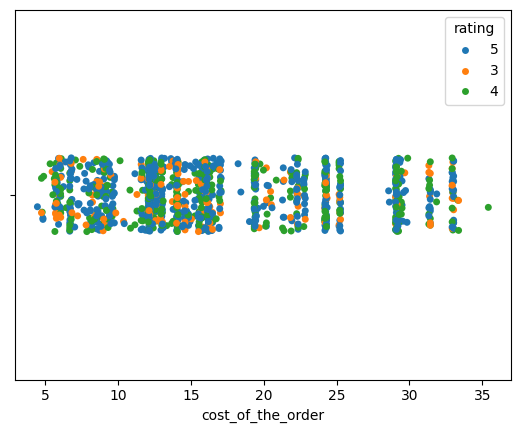

In [100]:
sns.stripplot(data=df, x='cost_of_the_order',  hue='rating')

<Axes: xlabel='food_preparation_time'>

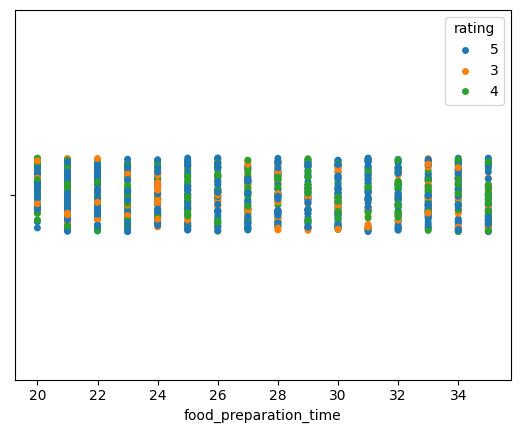

In [101]:
sns.stripplot(data=df, x='food_preparation_time',  hue='rating')

<Axes: xlabel='delivery_time'>

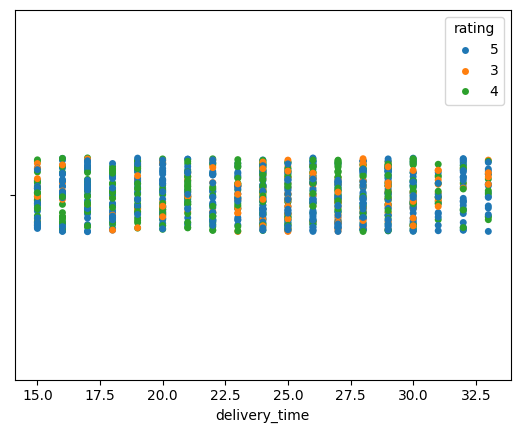

In [111]:
sns.stripplot(data=df, x='delivery_time',  hue='rating')

<Axes: xlabel='cost_of_the_order', ylabel='delivery_time'>

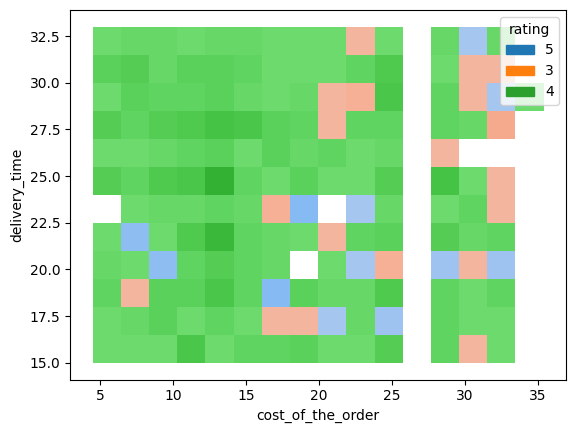

In [103]:
sns.histplot(data=df, x='cost_of_the_order', y='delivery_time',  hue='rating')

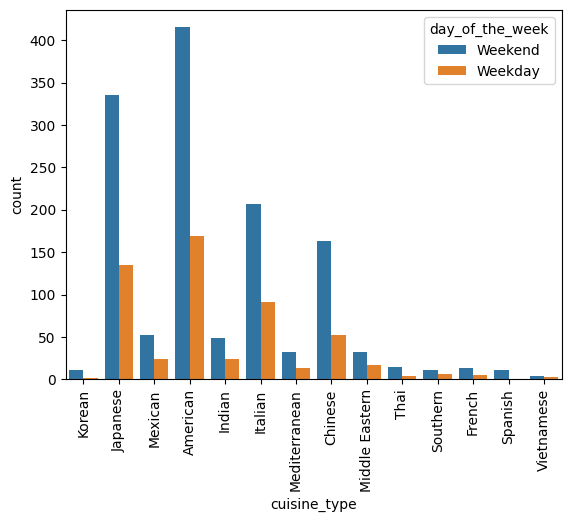

In [106]:
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week')
plt.xticks(rotation=90);

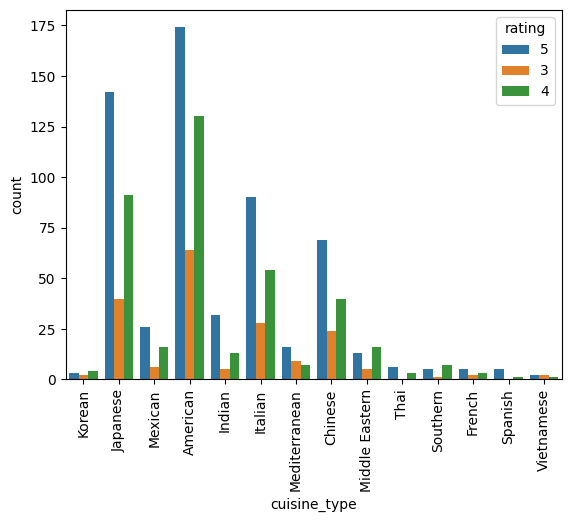

In [108]:
sns.countplot(data=df, x='cuisine_type', hue='rating')
plt.xticks(rotation=90);

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [218]:
# Write the code here
num_ratings = np.array([])
meets_criteria = []
restaurant_names = df['restaurant_name'].unique()
for R in restaurant_names:
    NR = df[df['restaurant_name'] == R]['rating'].shape[0] - df[df['restaurant_name'] == R]['rating'].isnull().sum()
    if NR > 0 & df[df['restaurant_name'] == R].shape[0]> 1:
        means = df[df['restaurant_name'] == R]['rating'].mean()
    else:
        means = float(list(df[df['restaurant_name'] == R]['rating'])[0])
    num_ratings = np.append(num_ratings, NR)
    if(NR > 50):
        if(means > 4):
            meets_criteria.append(R)
print(meets_criteria)

['Shake Shack']


#### Observations:
The restaurant fulfilling the criteria to get the promotional offer is Shake Shack

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [227]:
# Write the code here
net_revenue = df[df['cost_of_the_order']>20]['cost_of_the_order'].sum()*0.25 + df[df['cost_of_the_order']<=20][df['cost_of_the_order']>5]['cost_of_the_order'].sum()*0.15
print(net_revenue)

6166.303


C:\Users\Owner\AppData\Local\Temp\ipykernel_18636\1883542035.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  revenue = df[df['cost_of_the_order']>20]['cost_of_the_order'].sum()*0.25 + df[df['cost_of_the_order']<=20][df['cost_of_the_order']>5]['cost_of_the_order'].sum()*0.15


#### Observations:
The net revenue generated by the company across all orders is about $6166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [237]:
# Write the code here
percentage = (((df['delivery_time'] + df['food_preparation_time']) > 60).sum() / df['food_preparation_time'].shape[0])*100
print(percentage)

10.537407797681771


#### Observations:
The percentage of orders take more than 60 minutes to get delivered from the time the order is placed is 10.537407797681771%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [239]:
# Write the code here
df.groupby(['day_of_the_week'])['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:
The mean delivery time for the weekday is 28.340037 minutes and the weekend is 22.470022 minutes

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  The key insights/observations found were that American is the most popular cuisine type on the weekend and most orders are from the weekend. The business needs a strategy to increase overall revenue and the best way to do this is increase the number of orders made. 

### Recommendations:

*  Here are some of my recommendations that could increase revenue:
       
   - Give out promotional offers during the weekday to restraunts in the top 5 to increase revenue for the weekdays.
   - Give out discounted prices for more unpopular cuisine types and restraunts

---